<a href="https://colab.research.google.com/github/Neyder2502/salud-mental-analisis-datos/blob/main/notebooks/Neyder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODIGO PRINCIPAL

## LIBRERIAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, linregress

## ARCHIVO CSV

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Archivo cargado correctamente")

Saving Mental_Health_and_Social_Media_Balance_Dataset.csv to Mental_Health_and_Social_Media_Balance_Dataset (2).csv
Archivo cargado correctamente


## ESTRUCTURA Y CALIDAD DE DATOS

In [ ]:
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [ ]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
User_ID,0
Age,0
Gender,0
Daily_Screen_Time(hrs),0
Sleep_Quality(1-10),0
Stress_Level(1-10),0
Days_Without_Social_Media,0
Exercise_Frequency(week),0
Social_Media_Platform,0
Happiness_Index(1-10),0


## DETECCION DE VALORES ATIPICOS



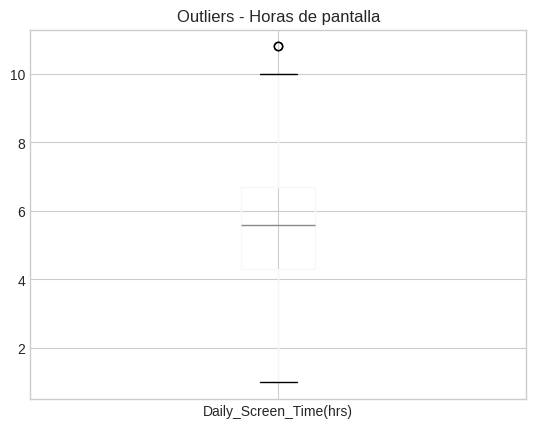

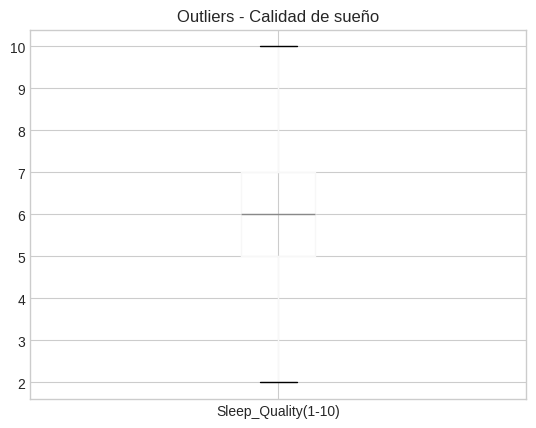

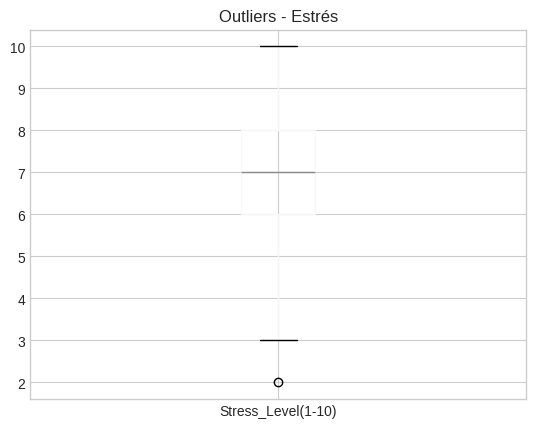

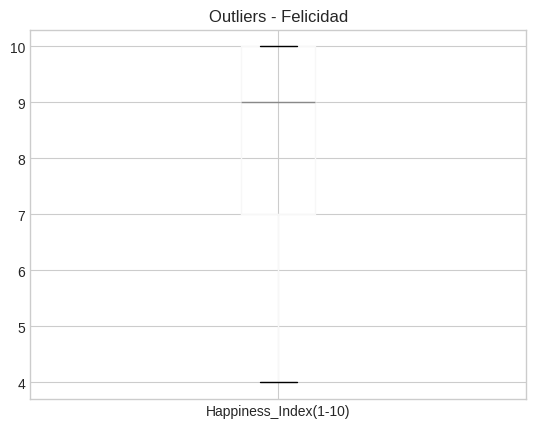

In [ ]:
df.boxplot(column=['Daily_Screen_Time(hrs)'])
plt.title('Outliers - Horas de pantalla')
plt.show()

df.boxplot(column=['Sleep_Quality(1-10)'])
plt.title('Outliers - Calidad de sueño')
plt.show()

df.boxplot(column=['Stress_Level(1-10)'])
plt.title('Outliers - Estrés')
plt.show()

df.boxplot(column=['Happiness_Index(1-10)'])
plt.title('Outliers - Felicidad')
plt.show()

In [ ]:
print("Edades fuera de rango:")
display(df[(df['Age'] < 10) | (df['Age'] > 80)])

print("\nHoras de pantalla fuera de rango:")
display(df[(df['Daily_Screen_Time(hrs)'] < 0) | (df['Daily_Screen_Time(hrs)'] > 24)])

print("\nCalidad de sueño fuera de 1-10:")
display(df[(df['Sleep_Quality(1-10)'] < 1) | (df['Sleep_Quality(1-10)'] > 10)])

print("\nEstrés fuera de 1-10:")
display(df[(df['Stress_Level(1-10)'] < 1) | (df['Stress_Level(1-10)'] > 10)])

print("\nFelicidad fuera de 1-10:")
display(df[(df['Happiness_Index(1-10)'] < 1) | (df['Happiness_Index(1-10)'] > 10)])

print("\nDías sin redes fuera de rango:")
display(df[(df['Days_Without_Social_Media'] < 0) | (df['Days_Without_Social_Media'] > 30)])

Edades fuera de rango:


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)



Horas de pantalla fuera de rango:


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)



Calidad de sueño fuera de 1-10:


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)



Estrés fuera de 1-10:


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)



Felicidad fuera de 1-10:


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)



Días sin redes fuera de rango:


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)


## ESTADISTICAS Y DISTRIBUICION DE VARIABLES

### estadistica

In [ ]:
df.describe().round(3)

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,32.988,5.530,6.304,6.618,3.134,2.448,8.376
std,9.961,1.735,1.530,1.543,1.859,1.428,1.524
min,16.000,1.000,2.000,2.000,0.000,0.000,4.000
25%,24.000,4.300,5.000,6.000,2.000,1.000,7.000
50%,34.000,5.600,6.000,7.000,3.000,2.000,9.000
75%,41.000,6.700,7.000,8.000,5.000,3.000,10.000
max,49.000,10.800,10.000,10.000,9.000,7.000,10.000


### distribucion

In [ ]:
df['Age'].value_counts()

,count
Age,
48,23
43,22
47,21
39,20
41,20
31,19
27,19
40,18
38,18


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,248
Female,229
Other,23


In [ ]:
df['Daily_Screen_Time(hrs)'].value_counts()

,count
Daily_Screen_Time(hrs),
6.2,19
5.0,17
6.5,13
5.6,13
4.3,12
...,...
9.8,1
9.5,1
9.3,1


In [ ]:
df['Sleep_Quality(1-10)'].value_counts()

,count
Sleep_Quality(1-10),
6.0,120
7.0,116
5.0,93
8.0,67
4.0,51
9.0,36
3.0,9
10.0,6
2.0,2


In [ ]:
df['Stress_Level(1-10)'].value_counts()

,count
Stress_Level(1-10),
7.0,129
6.0,109
8.0,89
5.0,76
9.0,40
4.0,32
10.0,14
3.0,10
2.0,1


In [ ]:
df['Days_Without_Social_Media'].value_counts()

,count
Days_Without_Social_Media,
3.0,92
4.0,87
2.0,86
5.0,78
1.0,58
0.0,48
6.0,36
7.0,14
9.0,1


In [ ]:
df['Exercise_Frequency(week)'].value_counts()

,count
Exercise_Frequency(week),
2.0,132
3.0,117
1.0,91
4.0,75
0.0,43
5.0,36
6.0,4
7.0,2


In [ ]:
df['Social_Media_Platform'].value_counts()

,count
Social_Media_Platform,
TikTok,95
X (Twitter),88
LinkedIn,87
Facebook,81
YouTube,75
Instagram,74


In [ ]:
df['Happiness_Index(1-10)'].value_counts()

,count
Happiness_Index(1-10),
10.0,162
8.0,106
9.0,94
7.0,76
6.0,39
5.0,16
4.0,7


# HABITOS DIGITALES Y SALUD MENTAL

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')  #pone el fondo y las rejas
sns.set_palette("husl")  #rosadita :p

## EDAD VS HORAS EN PANTALLA


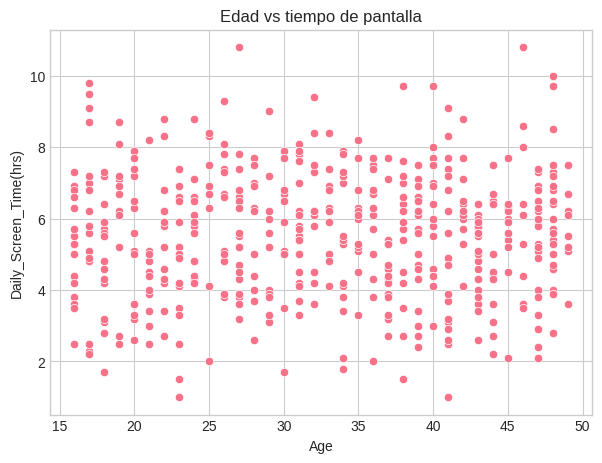

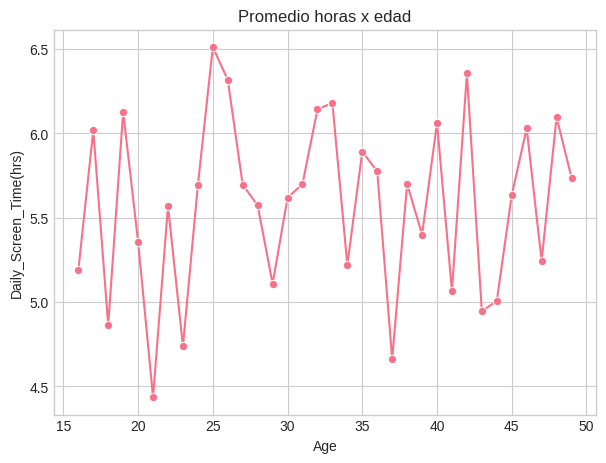

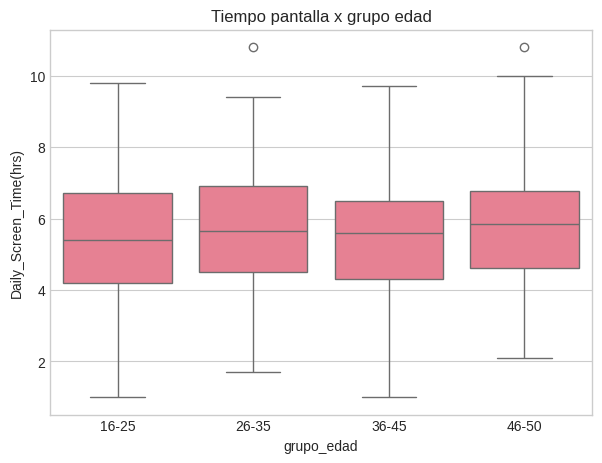

Pearson: 0.024, p=0.6000
No hay correlación


In [ ]:
# edad x pantalla
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Age", y="Daily_Screen_Time(hrs)")
plt.title("Edad vs tiempo de pantalla")
plt.show()  # eso es el scatterplot

# promedio x edad
prom = df.groupby("Age")["Daily_Screen_Time(hrs)"].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=prom, x="Age", y="Daily_Screen_Time(hrs)", marker="o")
plt.title("Promedio horas x edad")
plt.show()  # ese es el lineplot

# por rangos
bins = [15, 25, 35, 45, 50]
labels = ["16-25", "26-35", "36-45", "46-50"]
df["grupo_edad"] = pd.cut(df["Age"], bins=bins, labels=labels)
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="grupo_edad", y="Daily_Screen_Time(hrs)")
plt.title("Tiempo pantalla x grupo edad")
plt.show()  # ese es el boxplot o sea lo de las cajas

# la relacion:
corr, p = pearsonr(df["Age"], df["Daily_Screen_Time(hrs)"])
print(f"Pearson: {corr:.3f}, p={p:.4f}")
print("Hay correlación" if p < 0.05 else "No hay correlación")

## HORAS DE PANTALLA VS ESTRES

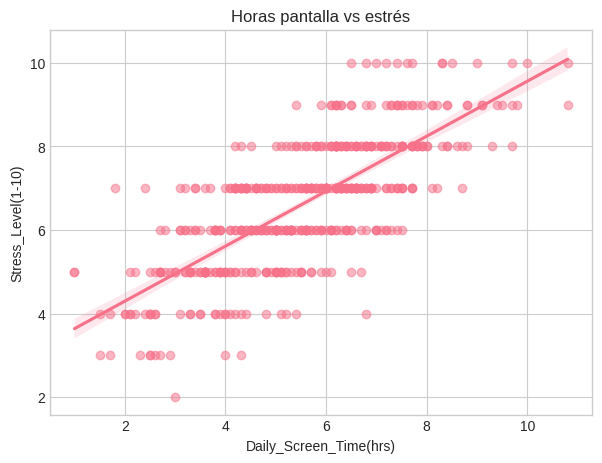

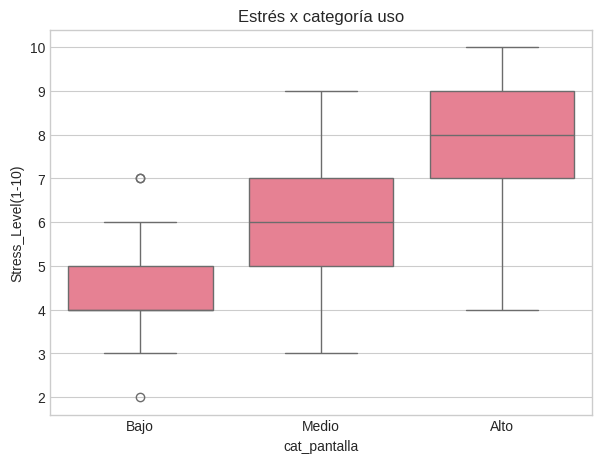

/tmp/ipython-input-1864803048.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(["cat_pantalla", "Stress_Level(1-10)"]).size().unstack(fill_value=0)


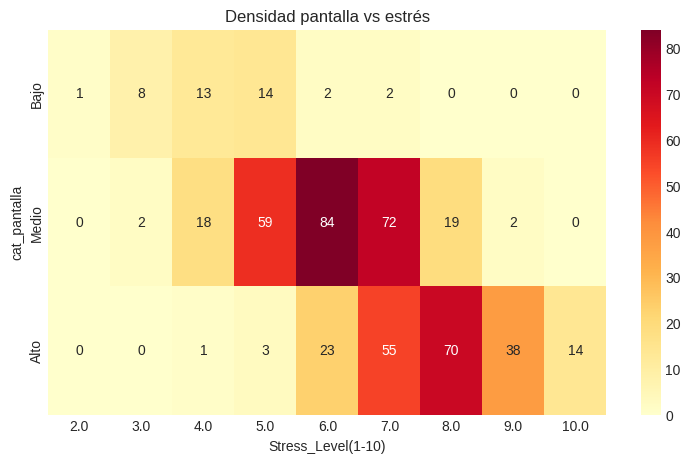

Pearson: 0.740, p=0.0000
Significativo

Promedio estres:
cat_pantalla
Bajo     4.35
Medio    6.06
Alto     7.76
Name: Stress_Level(1-10), dtype: float64


/tmp/ipython-input-1864803048.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("cat_pantalla")["Stress_Level(1-10)"].mean().round(2))


In [ ]:
# pantalla x estres
plt.figure(figsize=(7,5))
sns.regplot(data=df, x="Daily_Screen_Time(hrs)", y="Stress_Level(1-10)",
            scatter_kws={"alpha":0.5})
plt.title("Horas pantalla vs estrés")
plt.show()   # regplot

# agrupar por uso
bins = [0, 3, 6, 12]
labels = ["Bajo", "Medio", "Alto"]
df["cat_pantalla"] = pd.cut(df["Daily_Screen_Time(hrs)"], bins=bins, labels=labels)
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="cat_pantalla", y="Stress_Level(1-10)")
plt.title("Estrés x categoría uso")
plt.show()  # otro boxplot

# cosito de densidad
tabla = df.groupby(["cat_pantalla", "Stress_Level(1-10)"]).size().unstack(fill_value=0)
plt.figure(figsize=(9,5))
sns.heatmap(tabla, annot=True, fmt='d', cmap="YlOrRd")
plt.title("Densidad pantalla vs estrés")
plt.show()  # heatmap

# relacion
corr, p = pearsonr(df["Daily_Screen_Time(hrs)"], df["Stress_Level(1-10)"])
print(f"Pearson: {corr:.3f}, p={p:.4f}")
print("Significativo" if p < 0.05 else "No significativo")

# promedio x categoria
print("\nPromedio estres:")
print(df.groupby("cat_pantalla")["Stress_Level(1-10)"].mean().round(2))

## HORAS DE PANTALLA VS FELICIDAD

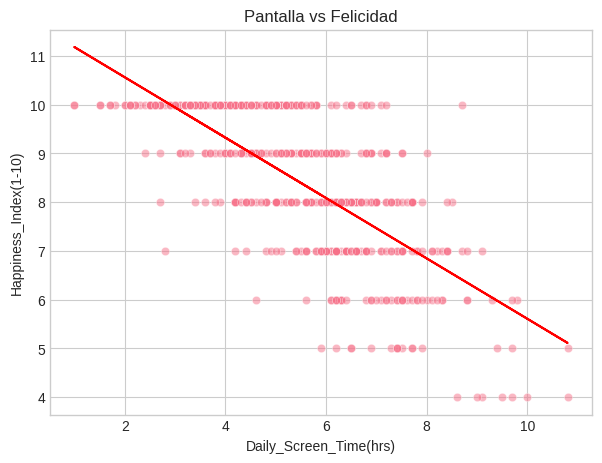

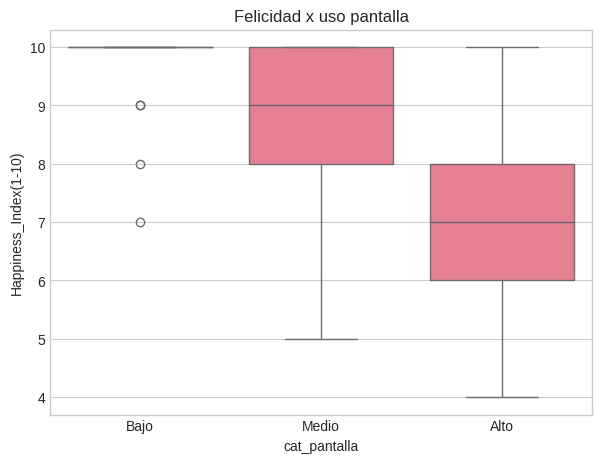

Pendiente: -0.6196
Intercepto: 11.8023
ecuacion: -0.6196x + 11.8023
R2: 0.4973
p-valor: 0.0000
Significativo


In [ ]:
# pantalla por felicidad
x = df['Daily_Screen_Time(hrs)']
y = df['Happiness_Index(1-10)']

reg = linregress(x, y)

plt.figure(figsize=(7,5))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, reg.intercept + reg.slope*x, color='red')
plt.title("Pantalla vs Felicidad")
plt.show()  #scatterplot

# felicidad por uso
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="cat_pantalla", y="Happiness_Index(1-10)")
plt.title("Felicidad x uso pantalla")
plt.show()  # boxplot (es la misma chimbada anterior pero otro grafico :D)

# resultados
print(f"Pendiente: {reg.slope:.4f}")
print(f"Intercepto: {reg.intercept:.4f}")
print(f"ecuacion: {reg.slope:.4f}x + {reg.intercept:.4f}")
print(f"R2: {reg.rvalue**2:.4f}")
print(f"p-valor: {reg.pvalue:.4f}")
print("Significativo" if reg.pvalue < 0.05 else "No significativo")

## DIAS SIN REDES VS ESTRES/FELICIDAD

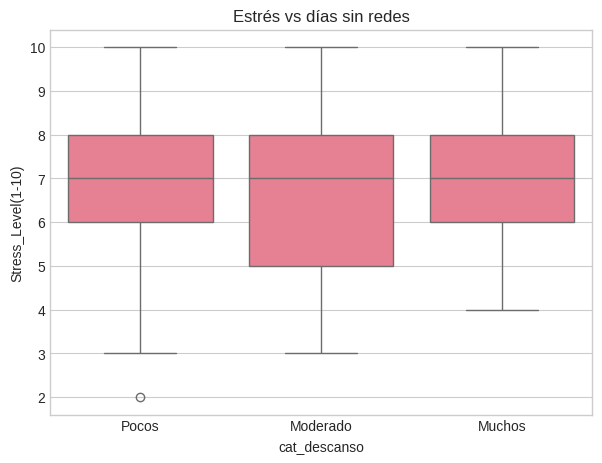

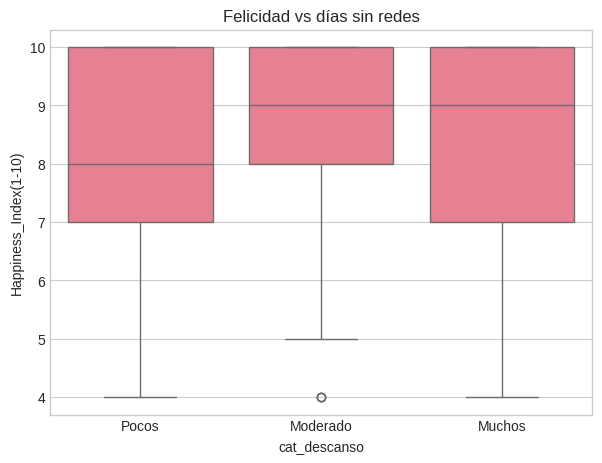

/tmp/ipython-input-3506486123.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prom = df.groupby('cat_descanso')[['Stress_Level(1-10)', 'Happiness_Index(1-10)']].mean()


<Figure size 700x500 with 0 Axes>

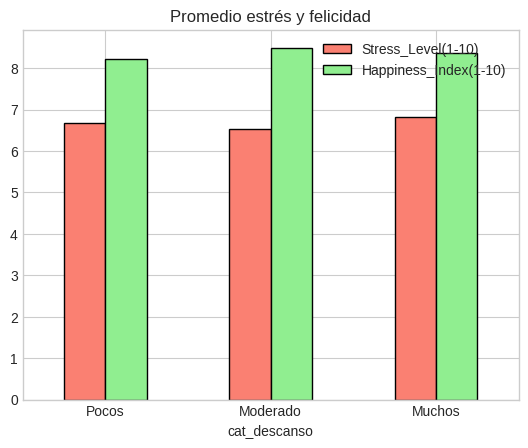

Promedio estres:
cat_descanso
Pocos       6.67
Moderado    6.54
Muchos      6.82
Name: Stress_Level(1-10), dtype: float64

Promedio felicidad:
cat_descanso
Pocos       8.22
Moderado    8.49
Muchos      8.37
Name: Happiness_Index(1-10), dtype: float64


In [ ]:
# categorias de dias sin redes
bins = [-1, 2, 5, 10]
labels = ['Pocos', 'Moderado', 'Muchos']
df['cat_descanso'] = pd.cut(df['Days_Without_Social_Media'], bins=bins, labels=labels)

# estres x dias sin redes
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='cat_descanso', y='Stress_Level(1-10)')
plt.title("Estrés vs días sin redes")
plt.show()  #bloxpot (pa estres)

# felicidad x dias sin redes
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='cat_descanso', y='Happiness_Index(1-10)')
plt.title("Felicidad vs días sin redes")
plt.show()  #bloxpot (pa felicidad)

# barras comparativas
prom = df.groupby('cat_descanso')[['Stress_Level(1-10)', 'Happiness_Index(1-10)']].mean()
plt.figure(figsize=(7,5))
prom.plot(kind='bar', color=['salmon', 'lightgreen'], edgecolor='black')
plt.title("Promedio estrés y felicidad")
plt.xticks(rotation=0)
plt.show()

# promedios
print("Promedio estres:")
print(prom['Stress_Level(1-10)'].round(2))
print("\nPromedio felicidad:")
print(prom['Happiness_Index(1-10)'].round(2))

## PLATAFORMA FAVORITA VS ESTRES

/tmp/ipython-input-1005882565.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estres_plat.index, y=estres_plat.values, palette="Purples_r")


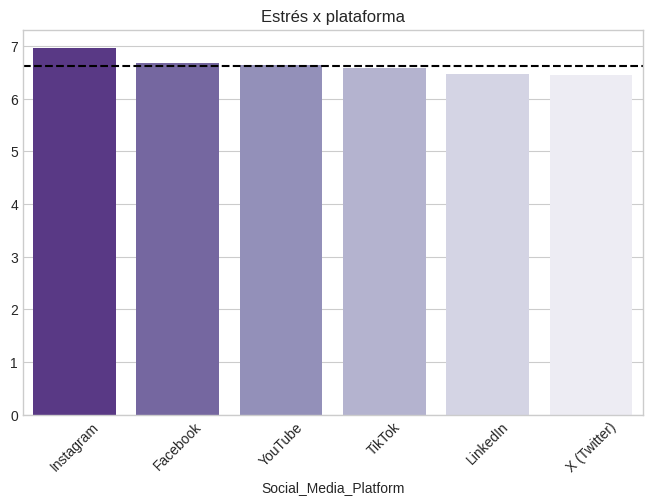

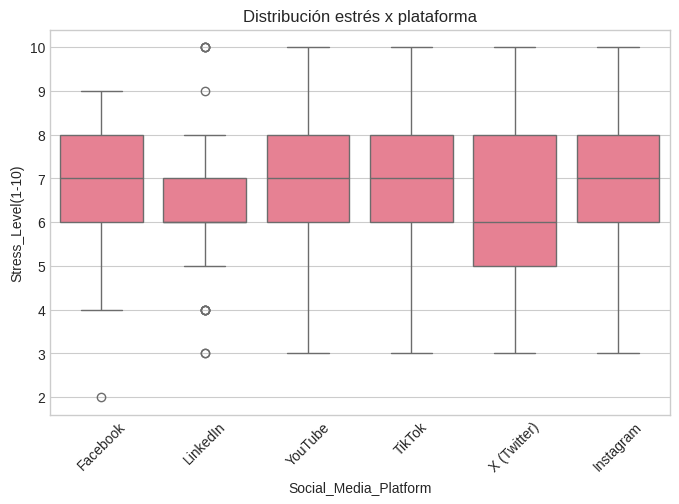

<Figure size 900x600 with 0 Axes>

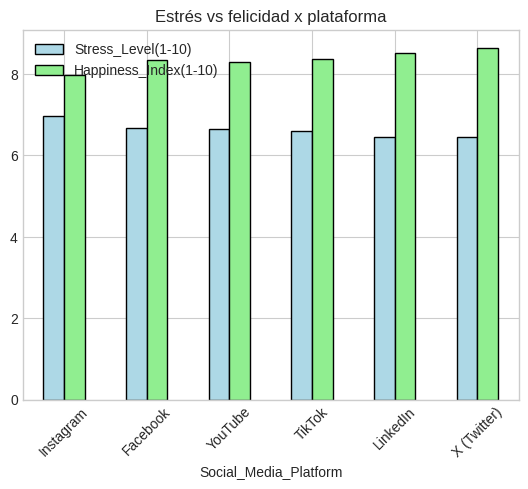

Stats por plataforma:
                      Stress_Level(1-10)             Happiness_Index(1-10)  \
                                    mean   std count                  mean   
Social_Media_Platform                                                        
Facebook                            6.67  1.47    81                  8.35   
Instagram                           6.96  1.51    74                  7.99   
LinkedIn                            6.46  1.48    87                  8.52   
TikTok                              6.59  1.67    95                  8.38   
X (Twitter)                         6.45  1.55    88                  8.65   
YouTube                             6.64  1.54    75                  8.31   

                             
                        std  
Social_Media_Platform        
Facebook               1.48  
Instagram              1.57  
LinkedIn               1.35  
TikTok                 1.63  
X (Twitter)            1.41  
YouTube                1.68  

Rank

In [ ]:
# estres promedio x plataforma
estres_plat = df.groupby('Social_Media_Platform')['Stress_Level(1-10)'].mean().sort_values(ascending=False)

# barras estres
plt.figure(figsize=(8,5))
sns.barplot(x=estres_plat.index, y=estres_plat.values, palette="Purples_r")
plt.axhline(y=df['Stress_Level(1-10)'].mean(), color="black", linestyle="--")
plt.title("Estrés x plataforma")
plt.xticks(rotation=45)
plt.show()

# boxplot estres
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Social_Media_Platform', y='Stress_Level(1-10)')
plt.title("Distribución estrés x plataforma")
plt.xticks(rotation=45)
plt.show()

# comparar estres y felicidad
comp = df.groupby('Social_Media_Platform')[['Stress_Level(1-10)', 'Happiness_Index(1-10)']].mean()
comp = comp.sort_values('Stress_Level(1-10)', ascending=False)

plt.figure(figsize=(9,6))
comp.plot(kind='bar', color=['lightblue', 'lightgreen'], edgecolor='black')
plt.title("Estrés vs felicidad x plataforma")
plt.xticks(rotation=45)
plt.show()

# estadisticas
stats = df.groupby('Social_Media_Platform').agg({
    'Stress_Level(1-10)': ['mean', 'std', 'count'],
    'Happiness_Index(1-10)': ['mean', 'std']
}).round(2)

print("Stats por plataforma:")
print(stats)
print("\nRanking estres:")
print(estres_plat.round(2))